[ 1.         11.          6.         ... 15.92698193 10.92698193
 20.92698193]
[0.         0.66666667 1.33333333 ... 0.74021596 1.40688263 0.29577152]


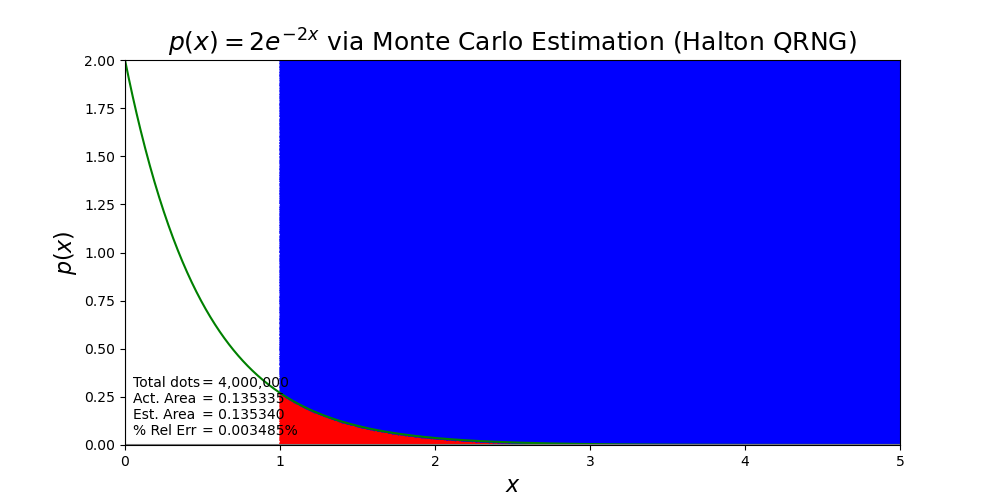

In [6]:
# particle_location.ipynb
# Cell 1 - PDF MC Estimation, Plot, % Error with Analytic Solution

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from numba import float64, vectorize
from matplotlib.patches import Rectangle

patch_size = Rectangle((1, 0), 20, 2.0)

@vectorize([float64(float64)], nopython=True)
def pdf(x): #p(x)
    return 2 * np.exp(-2 * x)

def evaled_cdf(): #integrated P(x) evaluated at 1 to infinity
    return np.exp(-2)

@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 1 #halton prime QRNG's
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_std_normal(ax):
    iterations_sqrt = 2000 #my cheap 1 year old laptop can handle this in about 5 seconds,
    #but feel free to lower this number if convenient. At 2,000 my rel. error is about 
    #however the error will increase if above number is lowered
    iterations = iterations_sqrt**2

    primes = [2, 3]

    x = patch_size.get_x() + halton(np.arange(iterations), primes[0]) * patch_size.get_width()
    #QRNG x's going from 1 to 20.
    #Our wavefunction decays so fast past x = 1 that this should be far enough to 
    #get a preview of the function's behavior at infinity (wf(x) goes to zero)
    y = patch_size.get_y() + halton(np.arange(iterations), primes[1]) * patch_size.get_height()

    d = pdf(x) - y

    x_in = x[d >= 0.0]
    y_in = y[d >= 0.0]

    x_out = x[d < 0.0]
    y_out = y[d < 0.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    act_x = np.linspace(0, 5, 1000) #plot pdf from x = 0 to x = 5
    act_y = pdf(act_x)
    ax.plot(act_x, act_y, color="green")

    est_area = np.count_nonzero(d >= 0.0) / iterations * patch_size.get_width() * patch_size.get_height()

    act_area = evaled_cdf() #pdf integrated from 1 to infinity

    err = (est_area - act_area) / act_area

    ax.set_title(r"$p(x) = 2e^{-2x} \mathrm{\ via \  Monte \ Carlo \ Estimation}$"
                 r"$\mathrm{\ (Halton \ QRNG)}$", fontsize=18)
    ax.set_xlabel(r'$x$', fontsize=16)
    ax.set_ylabel(r'$p(x)$', fontsize=16)
    ax.set_xlim(0, 5) #only going to show x out to 5
    ax.set_ylim(0, 2) #only showing y up to 2
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")

    ax.text(0.05, 0.05, "Total dots\nAct. Area\n" "Est. Area\n% Rel Err", ha="left")

    ax.text(
        0.5,
        0.05,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )

def main():
    plt.close("all")
    fig = plt.figure(label=" ")
    fig.set_size_inches(10, 5)
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])
    plot_std_normal(ax)

    plt.show()

main()

In [7]:
# Cell 2 - SciPy Integration

import numpy as np
import scipy.integrate as itg
from IPython.display import Math

def evaled_cdf(): #integrated p(x) evaluated at 1 to infinity
    return np.exp(-2)

def pdf(): #p(x)
    p = lambda x: 2 * np.exp(-2 * x)
    return p

def p_integrate(p):
    integral = itg.quad(p, 1, np.inf)[0] #define integral and bounds
    return integral

def main():
    p = pdf()
    ip = p_integrate(p)
    act_ip = evaled_cdf()
    err = (np.abs(ip - act_ip) / act_ip) * 100
    display(Math(rf"$\mathrm{{The \ SciPy \ estimation \ of \ }}p(x)$" 
                 rf"$ \ = 2e^{{-2x}} \ \ \ \mathrm{{is}} \ {ip:.6f}$"
                 rf"$\ \mathrm{{with \ a \ relative \ error \ of \ {err}}} \%.$"
                 r"$\mathrm{\ This \ is \ astronomically \ better \ than \ the \ above \ MC}$"
                 r"$\mathrm{\ estimate \ which \ has \ a \ relative \ error \ of}$"
                 r"$\ 0.003485 \%.$"))
    
main()

<IPython.core.display.Math object>